**Problem Statment**

to Predict whether a patient is be diagnosed with Heart Disease. 


In [ ]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# loading the dataset

heart_data = pd.read_csv('heart_data.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# number of rows and columns in the dataset

heart_data.shape

(303, 14)

In [ ]:
# information about dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Statistical measures of the data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# distribution of target variable       # 1 --> has heart disease    # 0 --> does not has heart disease

heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


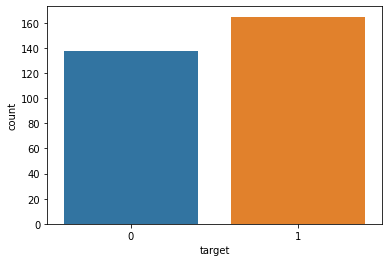

In [ ]:
# lets visualize the count

sns.countplot(heart_data['target'])

In [ ]:
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


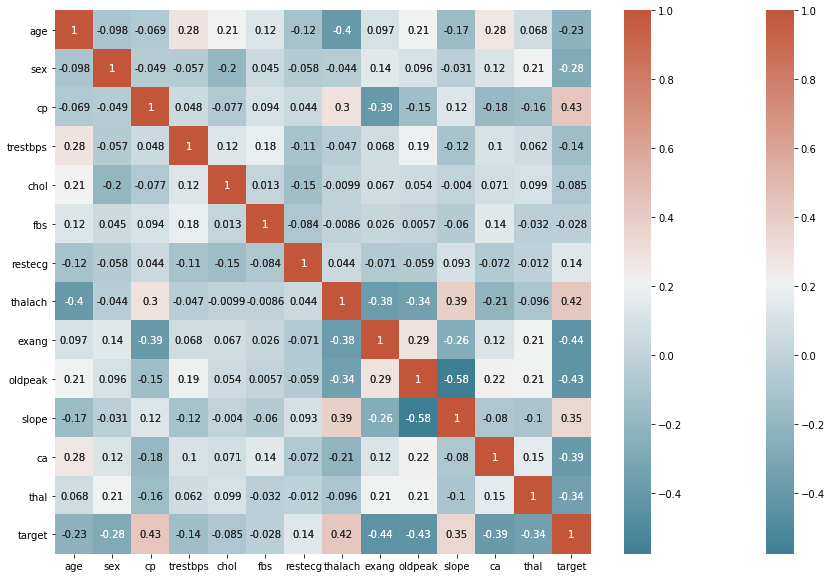

In [ ]:
corr = heart_data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=heart_data )
plt.title("ST depression Level vs. Heart Disease", fontsize=18)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

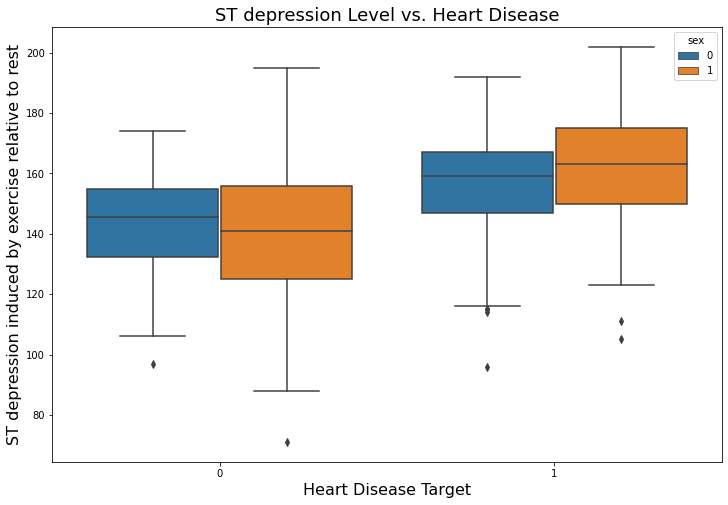

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=heart_data )
plt.title("ST depression Level vs. Heart Disease", fontsize=18)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

In [ ]:
# Splitting of Feature and Target variable

X = heart_data.drop(columns='target', axis=1)   # Feature variable
Y = heart_data['target']                        # Traget variable

print("Freature Variables: \n",X)
print()
print("Target Variable: \n",Y)

Freature Variables: 
      age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]

Target Variable: 
 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299   

In [ ]:
# Splitting of Feature and Target variable

X = heart_data.drop(columns='target', axis=1)   # Feature variable
Y = heart_data['target']                       # Traget variable

# Dividing the dataset into training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.18, stratify=Y, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (248, 13) (55, 13)


**Logistic Regression**

It is one of the popular ML Algorithm used in the case of predicting various categorical datasets

In [ ]:
# Building Machine Learning model with Logistic Regression

from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(X_train, Y_train)   # Trining the model with training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, Y_train)
print("Accuracy of Training data: ",training_accuracy)        # Accuracy of training data

Accuracy of Training data:  0.8709677419354839


In [ ]:
X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score( X_test_pred, Y_test) 

print("Accuracy of Test data: ",test_accuracy,"\n")       # Accuracy of test data
print(classification_report(Y_test, X_test_pred))         # output accuracy

Accuracy of Test data:  0.8181818181818182 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.83      0.83      0.83        30

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.82      0.82      0.82        55



**Model 2: SVM (Support Vector Machine)**

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model2 = SVC(random_state=1) # get instance of model
model2.fit(X_train, Y_train) # Train/Fit model 

Y_pred2 = model2.predict(X_test) # get y predictions
test_accuracy = accuracy_score( Y_pred2, Y_test)

print("Accuracy of Test data: ",test_accuracy,"\n")
print(classification_report(Y_test, Y_pred2)) # output accuracy

Accuracy of Test data:  0.8 

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.79      0.87      0.83        30

    accuracy                           0.80        55
   macro avg       0.80      0.79      0.80        55
weighted avg       0.80      0.80      0.80        55



**Model 3: Decision Trees:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(random_state=1) # get instance of model
model3.fit(X_train, Y_train) # Train/Fit model 

Y_pred3 = model3.predict(X_test) # get y predictions
test_accuracy = accuracy_score( Y_pred3, Y_test)

print("Accuracy of Test data: ",test_accuracy,"\n")
print(classification_report(Y_test, Y_pred3)) # output accuracy

Accuracy of Test data:  0.7818181818181819 

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.82      0.77      0.79        30

    accuracy                           0.78        55
   macro avg       0.78      0.78      0.78        55
weighted avg       0.78      0.78      0.78        55



**Model 4: Random Forest** 

In [ ]:
 from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier()# get instance of model
model4.fit(X_train, Y_train) # Train/Fit model 

Y_pred4 = model4.predict(X_test) # get y predictions
test_accuracy = accuracy_score( Y_pred4, Y_test)

print("Accuracy of Test data: ",test_accuracy,"\n")
print(classification_report(Y_test, Y_pred4)) # output accuracy

Accuracy of Test data:  0.8363636363636363 

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.84      0.87      0.85        30

    accuracy                           0.84        55
   macro avg       0.84      0.83      0.83        55
weighted avg       0.84      0.84      0.84        55



**Model 5: Naives Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

model5 = GaussianNB() # get instance of model
model5.fit(X_train, Y_train) # Train/Fit model

Y_pred5 = model5.predict(X_test) # get y predictions
test_accuracy = accuracy_score( Y_pred5, Y_test)

print("Accuracy of Test data: ",test_accuracy,"\n")
print(classification_report(Y_test, Y_pred5)) # output accuracy

Accuracy of Test data:  0.8 

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.81      0.83      0.82        30

    accuracy                           0.80        55
   macro avg       0.80      0.80      0.80        55
weighted avg       0.80      0.80      0.80        55



**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
c_m = confusion_matrix(Y_test, Y_pred4)
print(c_m)
accuracy_score(Y_test, Y_pred4)

[[20  5]
 [ 4 26]]


0.8363636363636363

**Feature Importance**

In [ ]:
importance = model4.feature_importances_

for i,v in enumerate(importance):               # summarize feature importance
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08930
Feature: 1, Score: 0.04178
Feature: 2, Score: 0.14139
Feature: 3, Score: 0.07459
Feature: 4, Score: 0.07947
Feature: 5, Score: 0.00925
Feature: 6, Score: 0.01723
Feature: 7, Score: 0.11586
Feature: 8, Score: 0.04980
Feature: 9, Score: 0.11417
Feature: 10, Score: 0.04052
Feature: 11, Score: 0.10350
Feature: 12, Score: 0.12314


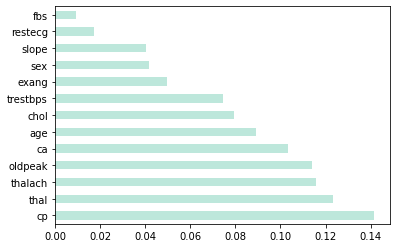

In [ ]:
index= heart_data.columns[:-1]
importance = pd.Series(model4.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='icefire')

**Prediction**

In [ ]:
input = model4.predict(sc.transform([[34,1,2,110,240,1,1,163,1,2.2,2,0,2]]))
print(input)

[1]


In [ ]:
input_X_test = np.array(X_test)
y_pred = model4.predict(input_X_test)

y_pred_com = np.concatenate((y_pred.reshape(len(y_pred),1), np.array(Y_test).reshape(len(Y_test),1)),1)
print(y_pred_com, len(y_pred_com))

[[1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]] 55


In [ ]:
# Predicting with data

inp = (67,1,1,115,254,0,1,140,0,0.2,1,2,3) 

#changing input into array
input_data = np.array(inp)

#reshaping the array
input_data_reshape = input_data.reshape(1,-1)


pred = model4.predict(input_data_reshape)
print(pred)